Name:Biswarup Karmakar(SR:21055)

# Problem **2**

In [1]:
import numpy as np
A=([8,1,6],[3,5,7],[4,9,2])
q,r=np.linalg.qr(A)
print("The orthogonal matrix Q=\n", q)
print("The rectangular matrix R=\n", r)

The orthogonal matrix Q=
 [[-0.8479983   0.52229204  0.09005497]
 [-0.31799936 -0.36546806 -0.8748197 ]
 [-0.42399915 -0.77048304  0.47600483]]
The rectangular matrix R=
 [[-9.43398113 -6.25398749 -8.16198368]
 [ 0.         -8.23939564 -0.96549025]
 [ 0.          0.         -4.63139839]]


# Problem 7

Calculating the SVD of rank deficient matrix

In [2]:
import numpy as np
A=np.array([[1,2,3],[4,5,6],[1,2,3],[5,7,9]])
b=np.array([1,2,3,4])
U,Sigma,Vt=np.linalg.svd(A,full_matrices=False)
print("U=\n",U)
print("Sigma=\n",Sigma)
print("Vt=\n",Vt)
print("UtU=\n",np.matmul(U,U.T))
x_lsq,residuals,rank,s=np.linalg.lstsq(A,b,rcond=-1)
U1=U[:,[0,1]]
Sigma1=np.diag(Sigma[[0,1]])
V1t=Vt[[0,1],:]
print("U1=\n",U1)
print("U1^T*U1=\n",np.matmul(U1.T,U1))
print("Sigma1=\n",Sigma1)
print("V1t=\n",V1t)
print("U1*Sigma1*V1t=\n",np.matmul(np.matmul(U1,Sigma1),V1t)) # A=U1*Sigma1*V1t
V1tSigma1_inv=np.matmul(V1t.T,np.linalg.inv(Sigma1))
U1tb=np.matmul(U1.T,b)
print("The least square solution=\n ",np.matmul(V1tSigma1_inv,U1tb))

U=
 [[-0.22948742  0.58935178  0.37294878]
 [-0.54417162 -0.55125062 -0.38170811]
 [-0.22948742  0.58935178 -0.7546569 ]
 [-0.77365903  0.03810116  0.38170811]]
Sigma=
 [1.60921520e+01 1.02109877e+00 2.79953545e-16]
Vt=
 [[-0.40416946 -0.56266067 -0.72115187]
 [-0.81852329 -0.12940752  0.55970824]
 [ 0.40824829 -0.81649658  0.40824829]]
UtU=
 [[ 0.5390908  -0.34235758  0.11855163  0.34235758]
 [-0.34235758  0.74570108  0.08805866  0.25429892]
 [ 0.11855163  0.08805866  0.96950703 -0.08805866]
 [ 0.34235758  0.25429892 -0.08805866  0.74570108]]
U1=
 [[-0.22948742  0.58935178]
 [-0.54417162 -0.55125062]
 [-0.22948742  0.58935178]
 [-0.77365903  0.03810116]]
U1^T*U1=
 [[ 1.00000000e+00 -1.64679025e-16]
 [-1.64679025e-16  1.00000000e+00]]
Sigma1=
 [[16.09215204  0.        ]
 [ 0.          1.02109877]]
V1t=
 [[-0.40416946 -0.56266067 -0.72115187]
 [-0.81852329 -0.12940752  0.55970824]]
U1*Sigma1*V1t=
 [[1. 2. 3.]
 [4. 5. 6.]
 [1. 2. 3.]
 [5. 7. 9.]]
The least square solution=
  [-1.00000000

# Problem 6


Here for $i=1$ to $100$ the data points $(t_i,f(t_i))$ satisfies a 14 degree polynomial such that $a_{14}t_i^{14}+...+a_1t_i+a_0=sin(10 t_i)$\
Then we get the system of equation $Ax=y$, where\
 $A=\begin{bmatrix}
    1 & t_1 & \dots  & t_1^{14} \\
    1 & t_2 &  \dots  & t_2^{14} \\
    \vdots &  \vdots & \ddots & \vdots \\
    1 & t_{100} & \dots  & t_{100}^{14}
\end{bmatrix}$ and 
$x=\begin{bmatrix}
    a_0\\
    a_1\\ 
    \vdots \\ 
    a_{14}
  \end{bmatrix}$
  Also $y=\begin{bmatrix}
    sin(10 t_1)\\
    sin(10 t_2)\\ 
    \vdots \\ 
    sin(10t_{100})
  \end{bmatrix}$. We want to find best x here such that $||Ax-y||_2$ is minimized.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sin
import copy
import pandas as pd
t=np.linspace(0,1,100)
#print("t=\n",t)
y =np.array( np.sin(10*t))
A=np.fliplr(np.vander(t, 15))#generating vandermonde matrix & flipping the 
#print(A)                      # column to put all the 1's in 1st column
                   
# Modified Gram schimdt from algorithm 8.1,Trfethen_Bau book
def MGS(A):
    m,n=A.shape
    v=[]
    q=[]
    r=np.zeros((n,n))
    for i in range(n):
        v.append(A[:,i])
    for i in range(n):
        r[i,i]=np.linalg.norm(v[i],2)
        q.append(v[i]/r[i,i])
   
        for j in range(i+1,n):
            r[i,j]=np.dot(q[i],v[j])
            v[j]=v[j]-r[i,j]*q[i]

    
    Q=np.transpose(np.array(q))
    R=np.matrix(r)
  
    return Q,R
#print(MGS(A))
y.shape
A.shape
np.linalg.matrix_rank(A)

15

In [4]:
#Householder QR factorisation from algorithm 10.1,10.2 in text book
def householder(A,y):
    R=copy.deepcopy(A)
    m,n = R.shape
    v = []
    q = []
    
    for i in range(n):
        x = R[i : m, i]
        e1 = np.zeros(len(x))
        e1[0] = 1
        v.append(x + (np.sign(x[0])*np.linalg.norm(x, 2)*e1))
        v[i] = v[i] / np.linalg.norm(v[i], 2)
        R[i : m, i : n] = R[i :m, i : n] - 2*(v[i].reshape(-1, 1))*np.dot(v[i],
R[i : m, i : n])
 
    b=copy.deepcopy(y)
    for i in range(n): #calculation of Q^t*y   
        b[i:m]=b[i:m]-2*np.dot(v[i],b[i:m])*v[i]
    
       
    R = R[:n, :n]
    b = b[:n]
    #print(R)   
    return R,b


In [5]:
#Back substitution
def back_sub(R,z):
  size=len(z)
  xcomp = np.zeros(size)

  for i in range(size-1, -1, -1):
    tmp = z[i]
    for j in range(size-1, i, -1):
        tmp -= xcomp[j]*R[i,j]
        
    xcomp[i] = tmp/R[i,i]
  return xcomp

In [6]:
#Gram-Schmidt Method
Q_mgs, R_mgs = MGS(A)
Qtb_mgs = np.matmul(np.transpose(Q_mgs), y)
x_mgs = back_sub(R_mgs, Qtb_mgs)
f_mgs=np.matmul(A,x_mgs)
#print("x_mgs=\n",x_mgs)
#Householder Method
R_hhold,Qtb_hhold=householder(A,y)
x_hholder=back_sub(R_hhold,Qtb_hhold)
f_hholder=np.matmul(A,x_hholder)


In [7]:
#SVD method using inbuilt libraries
U, sigma, Vt = np.linalg.svd(A, full_matrices = False)
Uty = np.matmul(np.transpose(U), y)    
Vtx= back_sub(np.diag(sigma),Uty)
x_svd = np.matmul(np.transpose(Vt),Vtx)
f_svd=np.matmul(A,x_svd)


In [8]:
# Using Normal equations
AtA= np.matmul(A.T, A)
x_normal = np.matmul(np.linalg.inv(AtA), np.matmul(A.T, y))
f_normal=np.matmul(A,x_normal)
#using library least square solution
x_lsq,residuals,rank,s=np.linalg.lstsq(A,y,rcond=-1)
f_lsq=np.matmul(A,x_lsq)


In [9]:
#Comparison between solution from the different Method
result_df = pd.DataFrame()
result_df['Modified Gram-Schmidt'] = x_mgs
result_df['Householder Factorization'] = x_hholder
result_df['SVD'] = x_svd
result_df['Normal Equation'] = x_normal
result_df['Library Inbuilt'] = x_lsq
result_df


,Modified Gram-Schmidt,Householder Factorization,SVD,Normal Equation,Library Inbuilt
0,-2.100401e-08,-1.603914e-07,-1.603941e-07,0.025028,-1.603941e-07
1,1.000001e+01,1.000006e+01,1.000006e+01,9.376842,1.000006e+01
2,-1.221437e-04,-3.149231e-03,-3.149232e-03,3.379533,-3.149232e-03
3,-1.666817e+02,-1.666106e+02,-1.666106e+02,-180.642216,-1.666106e+02
4,5.924263e-01,-2.959488e-01,-2.959491e-01,89.611298,-2.959491e-01
5,8.237059e+02,8.304565e+02,8.304565e+02,353.379395,8.304565e+02
6,8.880651e+01,5.522388e+01,5.522387e+01,1627.645508,5.522387e+01
7,-2.506321e+03,-2.392044e+03,-2.392044e+03,-5337.183594,-2.392044e+03
8,2.073696e+03,1.801110e+03,1.801110e+03,3664.898438,1.801110e+03
9,-2.968933e+03,-2.508831e+03,-2.508831e+03,2276.875000,-2.508831e+03


This shows that SVD and Housholder factorization produces nearby solution to each other.MGS also gives resonable result but the result from Normal equations is almost different from Library inbuilt .

In [10]:

x_x_library_norm=[]
for x in (x_mgs,x_hholder,x_svd,x_normal,x_lsq):
    x_x_library_norm.append(np.linalg.norm(x-x_lsq, 2))

residual_norm=[]
for f in (f_mgs,f_hholder,f_svd,f_normal,f_lsq):
    residual_norm.append(np.linalg.norm(f-y,2))
comparison_df=pd.DataFrame()
comparison_df['Method']=['MGS','Householder','SVD','Normal equations','Library inbuilt LSQ']
comparison_df['||x-x_library||_2']=x_x_library_norm
comparison_df['||Ax-y||_2']=residual_norm
comparison_df

,Method,||x-x_library||_2,||Ax-y||_2
0,MGS,9.291918e+02,0.000002
1,Householder,5.015996e-04,0.000002
2,SVD,9.532089e-07,0.000002
3,Normal equations,2.778386e+04,0.236495
4,Library inbuilt LSQ,0.000000e+00,0.000002


The Given matrix is full column rank matrix.
The above table shows that the approximation comes from SVD,Householder factorisation and from Library inbuilt give the similiar type of result.The Householder factorization and SVD factorization are more Numerical stable than Normal equations.MGS is also Numericallly unstable and orthogonality lost due to round off error.Hence this gives little bit worst result than SVD,householder.The orthogonality is retained in SVD and House holder factorization. The worst result we got for Normal equation, because of large floating point  error during the calculations of the  $(A^TA)^{-1}$. This leads to large error in solution.

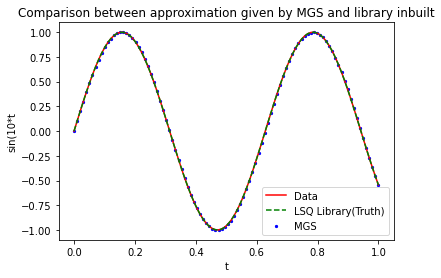

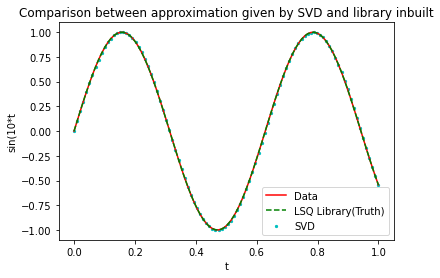

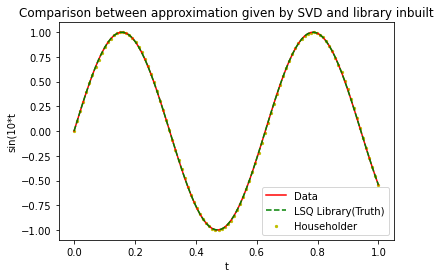

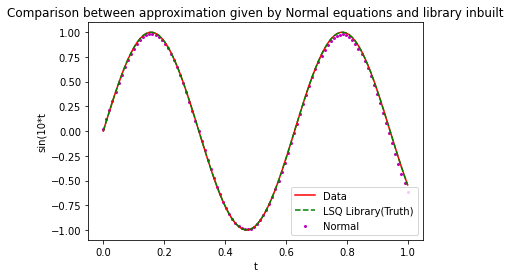

In [19]:
#Plotting the approximation
plt.figure()
plt.plot(t,y,color='r',label='Data')
plt.plot(t,f_lsq,'g--',label='LSQ Library(Truth)')
plt.scatter(t,f_mgs,color='b',s=5,label='MGS')
plt.title("Comparison between approximation given by MGS and library inbuilt")
plt.xlabel("t")
plt.ylabel("sin(10*t")
plt.legend()
plt.show()


plt.figure()
plt.plot(t,y,color='r',label='Data')
plt.plot(t,f_lsq,'g--',label='LSQ Library(Truth)')
plt.scatter(t,f_svd,color='c',s=5,label='SVD')
plt.title("Comparison between approximation given by SVD and library inbuilt")
plt.xlabel("t")
plt.ylabel("sin(10*t")
plt.legend()
plt.show()

plt.figure()
plt.plot(t,y,color='r',label='Data')
plt.plot(t,f_lsq,'g--',label='LSQ Library(Truth)')
plt.scatter(t,f_hholder,color='y',s=5,label='Householder')
plt.title("Comparison between approximation given by SVD and library inbuilt")
plt.xlabel("t")
plt.ylabel("sin(10*t")
plt.legend()
plt.show()


plt.figure()
plt.plot(t,y,color='r',label='Data')
plt.plot(t,f_lsq,'g--',label='LSQ Library(Truth)')
plt.scatter(t,f_normal,color='m',s=4,label='Normal')
plt.title("Comparison between approximation given by Normal equations and library inbuilt")
plt.xlabel("t")
plt.ylabel("sin(10*t")
plt.legend()
plt.show()



The difference is not much visible in approximation between the curve from data and plotting from Library inbuilt.The difference is visible for only normal equations.